In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import gdown
import pandas as pd

# New file ID from the provided Google Drive link
file_id = '1tnYRLKE8JmWwwzCzMQEJlNREYyq2tCOj'
output_filename = 'google_sheet_data.csv' # You can name the downloaded file whatever you like

# Construct the download URL for Google Drive files, often more reliable for sheets
gdown.download(f'https://docs.google.com/uc?export=download&id={file_id}', output_filename, quiet=False)

df = pd.read_csv(output_filename, encoding='latin1')

print("Data loaded successfully into DataFrame 'df'.")



Downloading...
From: https://docs.google.com/uc?export=download&id=1tnYRLKE8JmWwwzCzMQEJlNREYyq2tCOj
To: /content/google_sheet_data.csv
100%|██████████| 2.18k/2.18k [00:00<00:00, 7.35MB/s]

Data loaded successfully into DataFrame 'df'.


In [4]:
df.head()

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


<Axes: xlabel='cgpa', ylabel='package'>

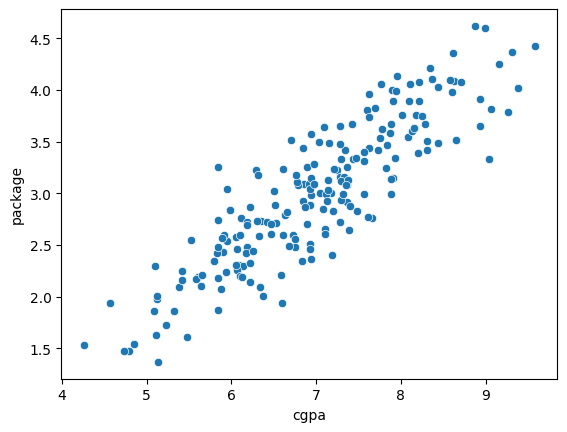

In [6]:
sns.scatterplot(data=df, x='cgpa', y='package')

In [7]:
x = df.iloc[:,0:1] # 'cgpa' column as feature
y = df.iloc[:,-1] # 'package' column as target

In [9]:
# Calculate the median of the 'package' column
median_package = df['package'].median()

# Create a new binary target column based on the median
df['package_category'] = (df['package'] >= median_package).astype(int)

print(f"Median package value used as threshold: {median_package:.2f}")
print("New binary target 'package_category' created.")

# Display the head of the DataFrame with the new column
display(df.head())

Median package value used as threshold: 3.00
New binary target 'package_category' created.


,cgpa,package,package_category
0,6.89,3.26,1
1,5.12,1.98,0
2,7.82,3.25,1
3,7.42,3.67,1
4,6.94,3.57,1


In [10]:
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Redefine features (x) and the new binary target (y)
X_perceptron = df.iloc[:, 0:1] # 'cgpa' as feature
y_perceptron = df['package_category'] # New binary target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_perceptron, y_perceptron, test_size=0.2, random_state=42)

# Initialize the Perceptron model
perceptron_model = Perceptron(random_state=42)

# Train the Perceptron model
perceptron_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = perceptron_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)

print("Perceptron model trained successfully.")
print(f"Accuracy of the Perceptron model: {accuracy:.2f}")

Perceptron model trained successfully.
Accuracy of the Perceptron model: 0.78


In [15]:
!pip install mlxtend
from mlxtend.plotting import plot_decision_regions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 27.3 MB/s eta 0:00:00


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  warnings.warn(


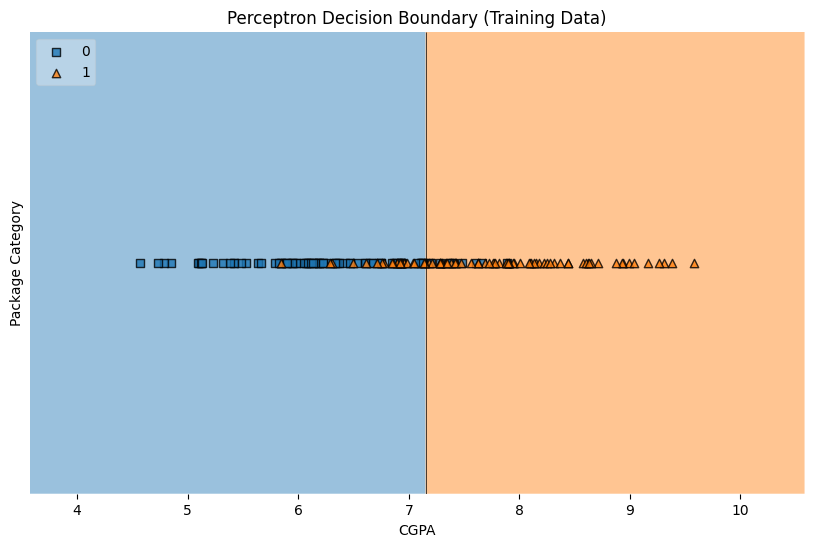

In [16]:
import matplotlib.pyplot as plt

# Ensure X_train and y_train are in the correct format for plot_decision_regions
# X_train needs to be a 2D array, and y_train a 1D array
X_train_array = X_train.values
y_train_array = y_train.values

# Reshape X_train_array if it's a single feature, to avoid a warning in plot_decision_regions
# plot_decision_regions expects at least 2 features for meaningful visualization of decision regions
# For a single feature, it will plot a vertical line at the decision boundary
if X_train_array.shape[1] == 1:
    # For 1D data, we can create a dummy second dimension or acknowledge it will be a line.
    # mlxtend.plotting.plot_decision_regions can handle 1D, but it's usually 2D for regions.
    # Let's create a synthetic second feature if needed for better visualization or acknowledge 1D plotting.
    # For now, let's use it as is, it will plot a vertical line.
    pass

plt.figure(figsize=(10, 6))
plot_decision_regions(X=X_train_array, y=y_train_array, clf=perceptron_model, legend=2)

plt.xlabel('CGPA')
plt.ylabel('Package Category')
plt.title('Perceptron Decision Boundary (Training Data)')
plt.show()